# Laboratory 3 - Models in credit and operational risk
**Bartłomiej Jamiołkowski 19.03.2022**

## Exercise 1

**What is the construction of the scoring model?**

Building a scoring model consists of several stages. The first step is to take into account the factors that receive the score. After selecting the explanatory and explained variables, the sample is divided into a training and test set. The built model is validated and then scaled. Finally, a cut-off point is selected.

**In a few sentences, describe your intuition related to your chosen statistical learning method.**

Naive Bayes classifier is a supervised statistical learning algorithm used for classification tasks.
It is used to find a class of observations based on a set of feature values that, according to Bayesian theory, are mutually independent and there is no correlation between them. In fact, this assumption is not met, hence the name "naive" algorithm.
The Naive Bayes classifier calculates the probability of a class given a set of feature values.

Action:

1) Calculating prior probability for given class labels.

2) Calculating the conditional probability with each attribute for each class.

3) Multiplying the conditional probabilities of the same class.

4) Multiplying the prior probability by the conditional probability.

5) Checking which class has the highest probability.

## Exercise 2

**Libraries used**

In [55]:
options(warn=-1)
library(dplyr)
library(extraoperators)
library(weights)
library(e1071) 
library(ggplot2)
library(GGally)
library(caret)
library(caTools)
library(MASS)

**Data import**

The dataset contains 1000 examples and 21 variables (20 potential explanatory variables and 1 explained variable).

In [2]:
german_credit <-  read.table("german.data", fileEncoding = "UTF-8", sep = " ")

In [3]:
head(german_credit, n = 3)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1


**Description of variables**

Understanding the importance of variables is essential in their selection to predict loan granting.

* V1 - account balance
* V2 - loan period in months
* V3 - credit history
* V4 - loan purpose
* V5 - loan amount
* V6 - Savings account
* V7 - length of current employment
* V8 - installment rate as a percentage of disposable income
* V9 - personal status and gender
* V10 - guarantors
* V11 - length of residence at the current address
* V12 - real estate
* V13 - age in years
* V14 - other installment plans
* V15 - type of residence
* V16 - number of loans taken in this bank
* V17 - employment status
* V18 - number of wards
* V19 - telephone
* V20 - foreign employee
* V21 - creditworthiness (1 - credit, 2 - no credit)

**Data structure**

Checking variable types.

In [4]:
str(german_credit)

'data.frame':	1000 obs. of  21 variables:
 $ V1 : Factor w/ 4 levels "A11","A12","A13",..: 1 2 4 1 1 4 4 2 4 2 ...
 $ V2 : int  6 48 12 42 24 36 24 36 12 30 ...
 $ V3 : Factor w/ 5 levels "A30","A31","A32",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ V4 : Factor w/ 10 levels "A40","A41","A410",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ V5 : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ V6 : Factor w/ 5 levels "A61","A62","A63",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ V7 : Factor w/ 5 levels "A71","A72","A73",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ V8 : int  4 2 2 2 3 2 3 2 2 4 ...
 $ V9 : Factor w/ 4 levels "A91","A92","A93",..: 3 2 3 3 3 3 3 3 1 4 ...
 $ V10: Factor w/ 3 levels "A101","A102",..: 1 1 1 3 1 1 1 1 1 1 ...
 $ V11: int  4 2 3 4 4 4 4 2 4 2 ...
 $ V12: Factor w/ 4 levels "A121","A122",..: 1 1 1 2 4 4 2 3 1 3 ...
 $ V13: int  67 22 49 45 53 35 53 35 61 28 ...
 $ V14: Factor w/ 3 levels "A141","A142",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ V15: Factor w/ 3 levels "A151","A152",..: 2 2 2 3 3 3 2 1 2 2 ...
 $ V16: 

**Transforming the raw data set**

When analyzing variables, it is necessary to take into account whether they are representative of a given problem. In the case of this data set, the variables: V11 (length of residence at the current address), V14 (other loans), V16 (type of apartment), V19 (telephone), etc. are not needed in the research. Even if there was a correlation with the explained variable, it would be an apparent correlation without justification. For this reason, a data set is created containing those variables whose presence is justified.

In [5]:
german_credit <- subset(german_credit, select =  c("V1", "V4", "V5", "V7", "V9", "V13", "V17", "V21"))

Looking at German credit data, you can see that some of the data is categorical and not suitable for certain machine learning models. For this reason, their type should be changed.

In [6]:
german_credit <− sapply(german_credit, unclass)
german_credit <- data.frame(german_credit[,])

Another problem with this data set is the undesirable values for the V21 creditworthiness class. This should be a binary variable. In this case, the value 1 is changed to 0 and the value 2 to 1. This means that the loan is granted and not granted, respectively.

In [7]:
german_credit$V21 <- ifelse(german_credit$V21 == 1, 0, 1)

Variable preview.

In [8]:
str(german_credit)

'data.frame':	1000 obs. of  8 variables:
 $ V1 : int  1 2 4 1 1 4 4 2 4 2 ...
 $ V4 : int  5 5 8 4 1 8 4 2 5 1 ...
 $ V5 : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ V7 : int  5 3 4 4 3 3 5 3 4 1 ...
 $ V9 : int  3 2 3 3 3 3 3 3 1 4 ...
 $ V13: int  67 22 49 45 53 35 53 35 61 28 ...
 $ V17: int  3 3 2 3 3 2 3 4 2 4 ...
 $ V21: num  0 1 0 0 1 0 0 0 0 1 ...


The visible data in the set varies in scale. For this reason, selected variables should be normalized. This will only be done in task 3, because it is worth keeping the data in its current form to draw rational conclusions from the descriptive analysis.

In [9]:
head(german_credit, n = 3)

V1,V4,V5,V7,V9,V13,V17,V21
1,5,1169,5,3,67,3,0
2,5,5951,3,2,22,3,1
4,8,2096,4,3,49,2,0


In [10]:
sum(is.na(german_credit))

[1] 0

There is no missing data in the set.

Detection and removal of outliers. Due to the presence of already transformed categorical variables, scaled and weighted variables are taken into account.

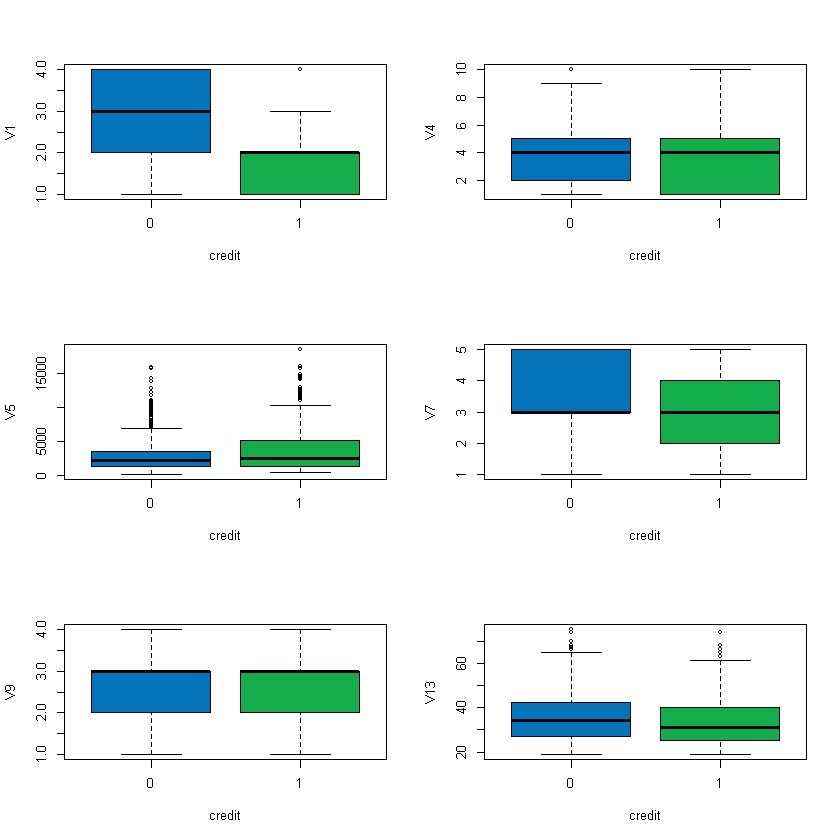

In [11]:
par(mfrow=c(3, 2))
boxplot(V1 ~ V21, data = german_credit, 
    col=c("#0474BA", "#13ae4b") ,
    ylab="V1" , xlab="credit")

boxplot(V4 ~ V21, data = german_credit, 
    col=c("#0474BA", "#13ae4b") ,
    ylab="V4" , xlab="credit")

boxplot(V5 ~ V21, data = german_credit, 
    col=c("#0474BA", "#13ae4b") ,
    ylab="V5" , xlab="credit")

boxplot(V7 ~ V21, data = german_credit, 
    col=c("#0474BA", "#13ae4b") ,
    ylab="V7" , xlab="credit")

boxplot(V9 ~ V21, data = german_credit, 
    col=c("#0474BA", "#13ae4b") ,
    ylab="V9" , xlab="credit")

boxplot(V13 ~ V21, data = german_credit, 
    col=c("#0474BA", "#13ae4b") ,
    ylab="V13" , xlab="credit")

Outliers come in variables: V1, V4, V5 and V13.

Dividing a set by a binary variable.

In [12]:
german_credit_0 <- subset(german_credit, V21 == 0)
german_credit_1 <- subset(german_credit, V21 == 1)

Removing outliers in the **V1** variable.

In [13]:
summary(german_credit_1$V1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   1.903   2.000   4.000 

In [14]:
interquantile_range = 2.000 - 1.000
min = 1.000 - 1.5*interquantile_range
max = 2.000 + 1.5*interquantile_range

In [15]:
german_credit <- subset(german_credit, V1 %gele% c(min, max))
german_credit_1 <- subset(german_credit_1, V1 %gele% c(min, max))

Removing outliers in the **V4** variable.

In [16]:
summary(german_credit_0$V4)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   4.274   5.000  10.000 

In [17]:
interquantile_range = 5.000 - 2.000
min = 2.000 - 1.5*interquantile_range
max = 5.000 + 1.5*interquantile_range

In [18]:
german_credit <- subset(german_credit, V4 %gele% c(min, max))
german_credit_0 <- subset(german_credit_0, V4 %gele% c(min, max))

Removing outliers in the **V5** variable.

Setting the boundary from which points are removed as outliers for two subsets.

Detection of quartile values for a variable from a subset of solvent companies.

In [19]:
summary(german_credit_0$V5)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    250    1352    2214    2948    3612   15857 

In [20]:
interquantile_range = 3612 - 1352
min = 1352 - 1.5*interquantile_range
max = 3612 + 1.5*interquantile_range

In [21]:
german_credit <- subset(german_credit, V5 %gele% c(min, max))
german_credit_0 <- subset(german_credit_0, V5 %gele% c(min, max))

In [22]:
summary(german_credit_1$V5)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    433    1288    2468    3875    5055   18424 

In [23]:
interquantile_range = 5055 - 1288
min = 1288 - 1.5*interquantile_range
max = 5055 + 1.5*interquantile_range

In [24]:
german_credit <- subset(german_credit, V5 %gele% c(min, max))
german_credit_1 <- subset(german_credit_1, V5 %gele% c(min, max))

Removing outliers in the **V13** variable.

Setting the boundary from which points are removed as outliers for two subsets.

Detection of quartile values for a variable from a subset of solvent companies.

In [25]:
summary(german_credit_0$V13)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   27.00   34.00   36.39   43.00   75.00 

In [26]:
interquantile_range = 43.00 - 27.00
min = 27.00 - 1.5*interquantile_range
max = 43.00 + 1.5*interquantile_range

In [27]:
german_credit <- subset(german_credit, V13 %gele% c(min, max))
german_credit_0 <- subset(german_credit_0, V13 %gele% c(min, max))

In [28]:
summary(german_credit_1$V13)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   25.00   31.00   33.76   40.00   74.00 

In [29]:
interquantile_range = 40.00 - 25.00
min = 25.00 - 1.5*interquantile_range
max = 40.00 + 1.5*interquantile_range

In [30]:
german_credit <- subset(german_credit, V13 %gele% c(min, max))
german_credit_1 <- subset(german_credit_1, V13 %gele% c(min, max))

**Balancing dataset**

Finding information on the number of positive and negative decisions regarding granting loans.

In [31]:
dim(german_credit_0)

[1] 583   8

In [32]:
dim(german_credit_1)

[1] 230   8

The resulting values indicate that the data set is unbalanced.

Creating a data frame of randomly selected insolvent companies.

In [33]:
new_german_credit_0 <- german_credit_0[sample(1:nrow(german_credit_0), 230), ]

Combining data frames.

In [34]:
german_credit <- rbind(new_german_credit_0, german_credit_1)

Conducting reindexing.

In [35]:
rownames(german_credit) <- 1:nrow(german_credit)

**Descriptive data analysis**

Calculating basic statistics.

In [36]:
summary(german_credit)

       V1             V4               V5              V7       
 Min.   :1.00   Min.   : 1.000   Min.   :  338   Min.   :1.000  
 1st Qu.:1.00   1st Qu.: 1.000   1st Qu.: 1314   1st Qu.:3.000  
 Median :2.00   Median : 4.000   Median : 2199   Median :3.000  
 Mean   :2.23   Mean   : 3.957   Mean   : 2746   Mean   :3.359  
 3rd Qu.:4.00   3rd Qu.: 5.000   3rd Qu.: 3511   3rd Qu.:5.000  
 Max.   :4.00   Max.   :10.000   Max.   :10297   Max.   :5.000  
       V9             V13             V17             V21     
 Min.   :1.000   Min.   :19.00   Min.   :1.000   Min.   :0.0  
 1st Qu.:2.000   1st Qu.:26.00   1st Qu.:3.000   1st Qu.:0.0  
 Median :3.000   Median :32.00   Median :3.000   Median :0.5  
 Mean   :2.643   Mean   :34.86   Mean   :2.863   Mean   :0.5  
 3rd Qu.:3.000   3rd Qu.:42.00   3rd Qu.:3.000   3rd Qu.:1.0  
 Max.   :4.000   Max.   :67.00   Max.   :4.000   Max.   :1.0  

Distinct statistics of non-categorical variables show that:
* the largest credit is 10297 currencies and the smallest is 250. The average credit is 2697 currencies.
* the average age of a person applying for a loan is over 34 years. The youngest person to apply for a loan was 19 years old and the oldest was 66 years old

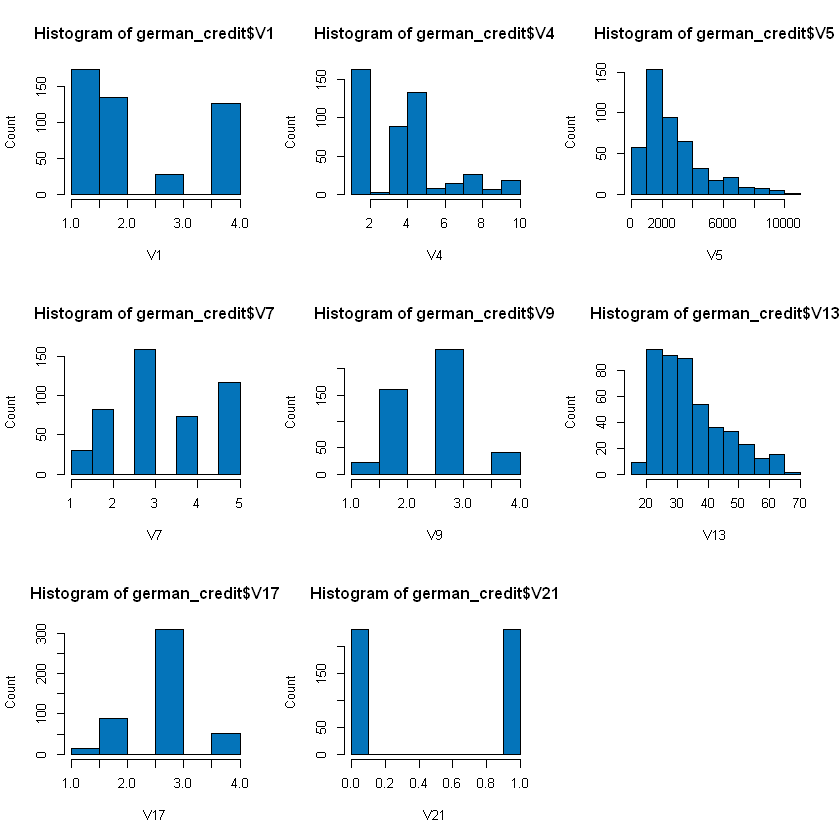

In [37]:
par(mfrow=c(3, 3))
hist(german_credit$V1, 
    col= "#0474BA",
    ylab="Count" , xlab="V1")

hist(german_credit$V4, 
    col= "#0474BA",
    ylab="Count" , xlab="V4")

hist(german_credit$V5, 
    col= "#0474BA",
    ylab="Count" , xlab="V5")

hist(german_credit$V7, 
    col= "#0474BA",
    ylab="Count" , xlab="V7")

hist(german_credit$V9, 
    col= "#0474BA",
    ylab="Count" , xlab="V9")

hist(german_credit$V13, 
    col= "#0474BA" ,
    ylab="Count" , xlab="V13")

hist(german_credit$V17, 
    col= "#0474BA",
    ylab="Count" , xlab="V17")

hist(german_credit$V21, 
    col= "#0474BA",
    ylab="Count" , xlab="V21")

The histograms presented indicate:
* the data set is balanced
* there are many accounts with a negative balance, the least of which are those with significant funds. This may mean that people without financial problems rarely take out loans
* most people indicated that they would like to buy a new car, radio and television with the loan. The remaining goals were much less popular
* in the V5 loan amounts, it can be observed that with the loan amount, the number of people deciding to take such a step or the number of people to whom the bank would agree to transfer such an amount decreases
* in variable V7, the fewest loans are granted to unemployed people, and the most to people with professional experience of 1-4 years.
* the fewest loans are granted to single women and divorcees, and the most to married men or widowers
* most loans are granted to people aged 20-30. The older a person is, the more difficult it is to get a loan
* most loans in variable V17 are granted to qualified employees. The management has few loans because they don't need them

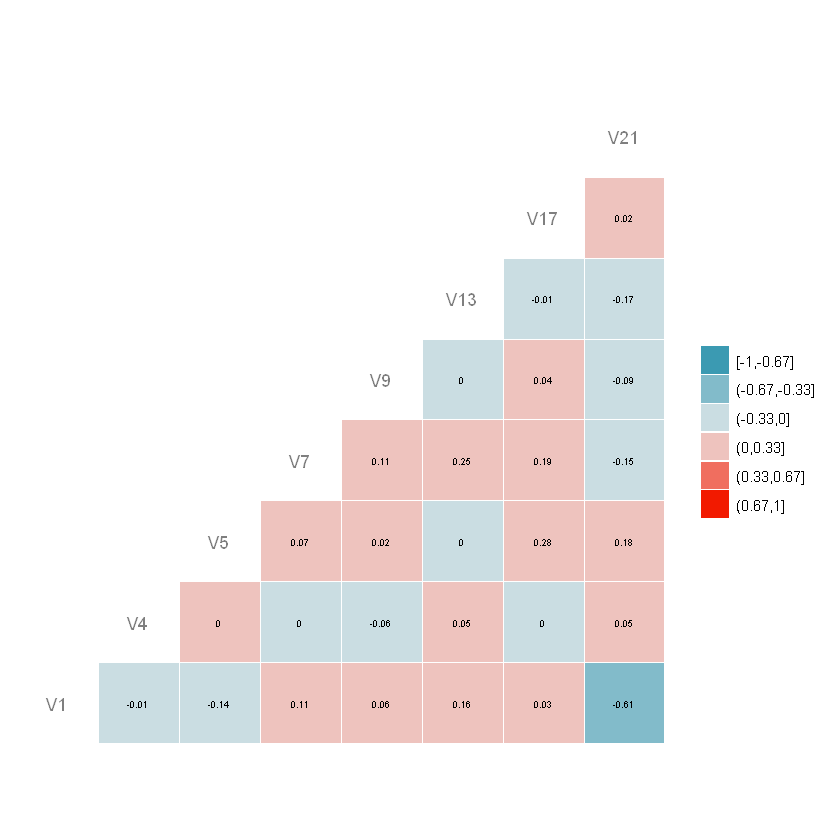

In [38]:
ggcorr(german_credit,
     nbreaks = 6,
     label = TRUE,
     label_size = 2,
     label_round = 2,
     color = "grey50")

The presented correlation matrix indicates that the variable V1 is the most strongly correlated variable with the creditworthiness variable V21. The remaining variables are not or only weakly correlated with creditworthiness. Variable V13 will be omitted from the model because it is correlated with variable V7.

In [39]:
german_credit <- german_credit[-6]

## Exercise 3

Normalization of explanatory variables.

In [40]:
normalization <- function(x){
return ((x - min(x)) / (max(x) - min(x)))}

In [41]:
for(i in 1:6){
    german_credit[i] = normalization(german_credit[i])
}

In [42]:
head(german_credit, n = 3)

V1,V4,V5,V7,V9,V17,V21
0,0.4444444,0.2054423,1.0,0.6666667,0.3333333,0
1,0.0000000,0.1803394,0.5,0.6666667,0.6666667,0
0,0.1111111,0.6106035,1.0,0.3333333,1.0000000,0


**Division of the set into training and testing**

The data set is divided into a 30% test set and a 70% training set.

In [43]:
set.seed(123)
ind <- sample(2, nrow(german_credit), replace = TRUE, prob = c(0.7, 0.3))
training_set <- german_credit[ind == 1,]
testing_set <- german_credit[ind == 2,]

## Exercise 4

### 4.1 Naive Bayes 

Fitting a Naive Bayes model to the training dataset.

In [44]:
set.seed(120)  # Setting Seed
model <- naiveBayes(V21 ~ ., data = training_set, family = binomial)
credit_pred <- predict(model, newdata = testing_set)
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace, family = ..1)

A-priori probabilities:
Y
        0         1 
0.5075988 0.4924012 

Conditional probabilities:
   V1
Y        [,1]      [,2]
  0 0.6187625 0.4176101
  1 0.1419753 0.1887285

   V4
Y        [,1]      [,2]
  0 0.3193613 0.2232838
  1 0.3367627 0.3121699

   V5
Y        [,1]      [,2]
  0 0.2028136 0.1382008
  1 0.2682009 0.2282367

   V7
Y        [,1]      [,2]
  0 0.6452096 0.3035053
  1 0.5586420 0.3097073

   V9
Y        [,1]      [,2]
  0 0.5648703 0.2155674
  1 0.5390947 0.2468177

   V17
Y        [,1]      [,2]
  0 0.6167665 0.2244396
  1 0.6152263 0.2120295


**Model quality check.**

In [45]:
confusion_matrix <- table(testing_set$V21, credit_pred)
confusion_matrix

   credit_pred
     0  1
  0 48 15
  1 11 57

* 37 decisions to grant a loan were correctly classified as positive
* 26 decisions to grant a loan were incorrectly classified as positive
* 13 decisions to grant a loan were incorrectly classified as negative
* 55 decisions to grant a loan were correctly classified as negative

In [46]:
confusionMatrix(confusion_matrix)

Confusion Matrix and Statistics

   credit_pred
     0  1
  0 48 15
  1 11 57
                                          
               Accuracy : 0.8015          
                 95% CI : (0.7229, 0.8661)
    No Information Rate : 0.5496          
    P-Value [Acc > NIR] : 1.377e-09       
                                          
                  Kappa : 0.6015          
                                          
 Mcnemar's Test P-Value : 0.5563          
                                          
            Sensitivity : 0.8136          
            Specificity : 0.7917          
         Pos Pred Value : 0.7619          
         Neg Pred Value : 0.8382          
             Prevalence : 0.4504          
         Detection Rate : 0.3664          
   Detection Prevalence : 0.4809          
      Balanced Accuracy : 0.8026          
                                          
       'Positive' Class : 0               
                                          

In [47]:
credit_pred1 <- as.vector(credit_pred)
testing_set1 <- as.vector(testing_set)
perf_indexes = function(cm){
 sensitivity = cm[2,2] / (cm[1,2] + cm[2,2])
 specificity = cm[1,1] / (cm[1,1] + cm[2,1])
 accuracy = sum(diag(cm)) / sum(cm)
 return(c(sens=sensitivity,spec=specificity,acc=accuracy))
}
perf_indexes(table(credit_pred1, testing_set1$V21))

sens      spec       acc 
0.8382353 0.7619048 0.8015267

**Conclusions**

The prediction accuracy of the model is approximately 83.82%.

Specificity indicates the model's ability to predict true negatives in each available category at 76.19%.

Sensitivity indicates the model's ability to predict true positives in each available category at 80.15%.

### 4.2 Logistic regression

Building model

In [48]:
model <- glm(V21 ~ ., data = training_set, family = binomial)
summary(model)


Call:
glm(formula = V21 ~ ., family = binomial, data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0132  -0.4910  -0.2649   0.7733   2.0719  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.2967     0.5839   2.221   0.0264 *  
V1           -4.0361     0.4727  -8.539   <2e-16 ***
V4            0.3907     0.4987   0.783   0.4334    
V5            1.6358     0.7863   2.080   0.0375 *  
V7           -0.7855     0.4729  -1.661   0.0967 .  
V9           -0.2913     0.6103  -0.477   0.6331    
V17           0.2306     0.6853   0.337   0.7365    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 456.01  on 328  degrees of freedom
Residual deviance: 314.07  on 322  degrees of freedom
AIC: 328.07

Number of Fisher Scoring iterations: 5


In [49]:
credit_pred <- predict(model, newdata = testing_set)

In [50]:
perf_indexes(table(credit_pred, testing_set$V21))

sens        spec         acc 
        NaN 0.500000000 0.007633588

**Conclusions**

The model's prediction accuracy is approximately NA.

Specificity indicates the model's ability to predict true negatives in each available category by 50%.

Sensitivity indicates the model's ability to predict true positives within 0.76% of each available category.

### 4.3 LDA

Creating an LDA model.

In [51]:
model = lda(V21 ~ ., data = training_set, family = binomial)
model

Call:
lda(V21 ~ ., data = training_set, family = binomial)

Prior probabilities of groups:
        0         1 
0.5075988 0.4924012 

Group means:
         V1        V4        V5        V7        V9       V17
0 0.6187625 0.3193613 0.2028136 0.6452096 0.5648703 0.6167665
1 0.1419753 0.3367627 0.2682009 0.5586420 0.5390947 0.6152263

Coefficients of linear discriminants:
           LD1
V1  -2.9262044
V4   0.2395924
V5   1.1287589
V7  -0.5313162
V9  -0.1678255
V17  0.1713488

In [52]:
testing_set2 <- testing_set
credit_pred2 = predict(model, newdata = testing_set2)
names(credit_pred2)
head(credit_pred2$posterior)

[1] "class"     "posterior" "x"

,0,1
2,0.9498083,0.05019166
4,0.5711106,0.42888938
5,0.4470856,0.55291436
8,0.9597340,0.04026595
11,0.9564561,0.04354389
16,0.9647091,0.03529088


In [53]:
perf_indexes(table(credit_pred2$class, testing_set2$V21))

sens      spec       acc 
0.7941176 0.7777778 0.7862595

**Conclusions**

The prediction accuracy of the model is approximately 79.41%.

Specificity indicates the model's ability to predict true negatives in each available category at 77.78%.

Sensitivity indicates the model's ability to predict true positives in each available category at 78.62%.

## Exercise 5

|        |       Naive Bayes       |   Logistic Regression   |           LDA           |
|--------|-------------------------|-------------------------|-------------------------|
|  SENS  | 0.838235294117647       |  NA                     | 0.794117647058823       |
|--------|-------------------------|-------------------------|-------------------------|
|  SPEC  | 0.761904761904762       | 0.5                     | 0.777777777777778       |
|--------|-------------------------|-------------------------|-------------------------|
|  ACC   | 0.801526717557252       | 0.00763358778625954     | 0.786259541984733       |

Analyzing the results in the table, the conclusions can be drawn that:

* according to available data, the most accurate prediction model is the Naive Bayes classifier
* specificity indicates the ability of the model to predict true negatives in each available category. The LDa model is the best at this, followed by Naive Bayes, and third, if this result is to be believed, is randomistic regression
*sensitivity indicates the model's ability to predict true positives in each available category. In this respect, the Naive Bayes classifier model turned out to be the best.

To sum up, one can get the impression that the Bayesian classifier is quite a good classifier.